In [117]:
#My default packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cmasher as cmr

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from dataclasses import dataclass
import itertools
import heapq


# Day 14

In [81]:
with open("input14.txt") as f:
    rocks = [[[int(a) for a in nodes.split(",")] for nodes in l.rstrip().split(" -> ")] for l in f.readlines()]

In [82]:
coords = np.array([r  for subr in rocks for r in subr ])
coords.min(axis=0),coords.max(axis=0)

(array([482,  13]), array([556, 160]))

In [136]:
Ny,Nx = (170,100)
xoffset = 470
caveabyss = np.zeros((Ny,Nx),dtype=int)
#Adding rocks
for rock in rocks:
    for k in range(1,len(rock)):
        a,b = rock[k-1:k+1]
        ax,bx = sorted([a[0]-xoffset,b[0]-xoffset])
        ay,by = sorted([a[1],b[1]])
        caveabyss[ay:by+1,ax:bx+1] = 2


In [137]:
def addsand(c,sp):
    Ny = c.shape[0]
    while sp:
        x,y = sp[-1]
        if y<Ny-1:
            stuck=True
            for nx in [x,x-1,x+1]:
                if c[y+1,nx]==0:
                    sp.append((nx,y+1))
                    stuck=False
                    break
            if stuck:
                c[y,x] = 1
                sp.pop()
        else:
            print("Abyss reached")
            return None
    print("Entrance stucked")


In [138]:
sandpathabyss = [(500-xoffset,0)]
addsand(caveabyss,sandpathabyss)


Abyss reached


Total sand: 901


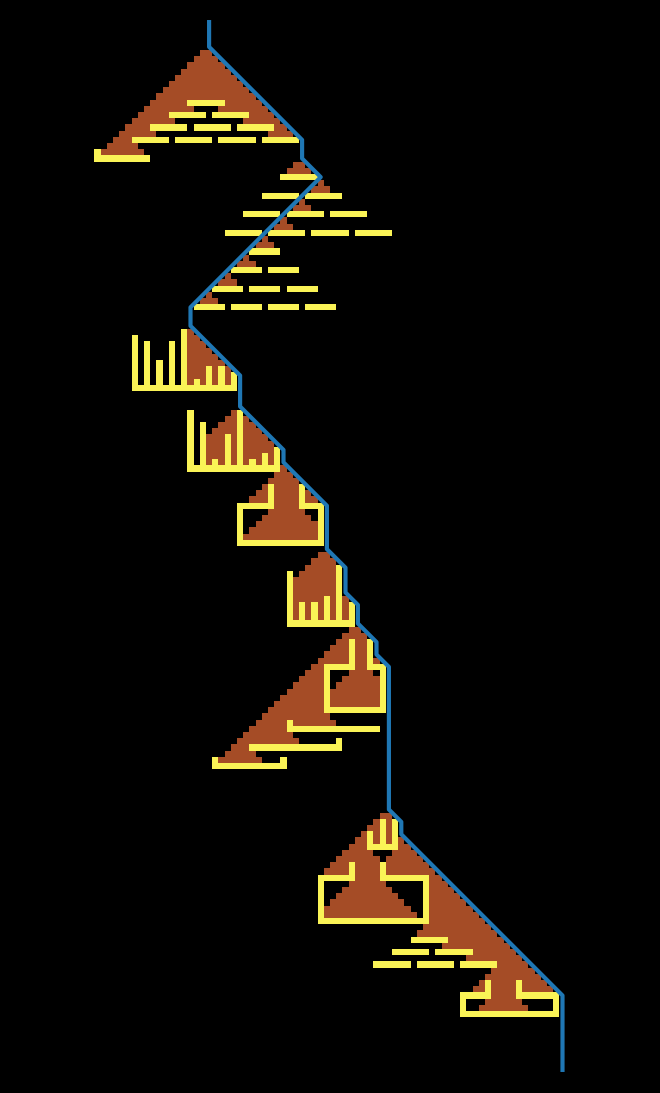

In [139]:
fig,ax = plt.subplots(figsize=(4,8))
ax.imshow(caveabyss,origin="upper",cmap="cmr.amber")
ax.plot(*(np.array(sandpathabyss).T),c="tab:blue")
print(f"Total sand: {(caveabyss==1).sum()}")
ax.axis("off")
fig.set_facecolor("k")

In [140]:
Ny,Nx = (165,350)
xoffset = 330
cave = np.zeros((Ny,Nx),dtype=int)
#Adding rocks
for rock in rocks:
    for k in range(1,len(rock)):
        a,b = rock[k-1:k+1]
        ax,bx = sorted([a[0]-xoffset,b[0]-xoffset])
        ay,by = sorted([a[1],b[1]])
        cave[ay:by+1,ax:bx+1] = 2
cave[-3:]=2

In [141]:
sandpath = [(500-xoffset,0)]
addsand(cave,sandpath)

Entrance stucked


Total sand: 24589


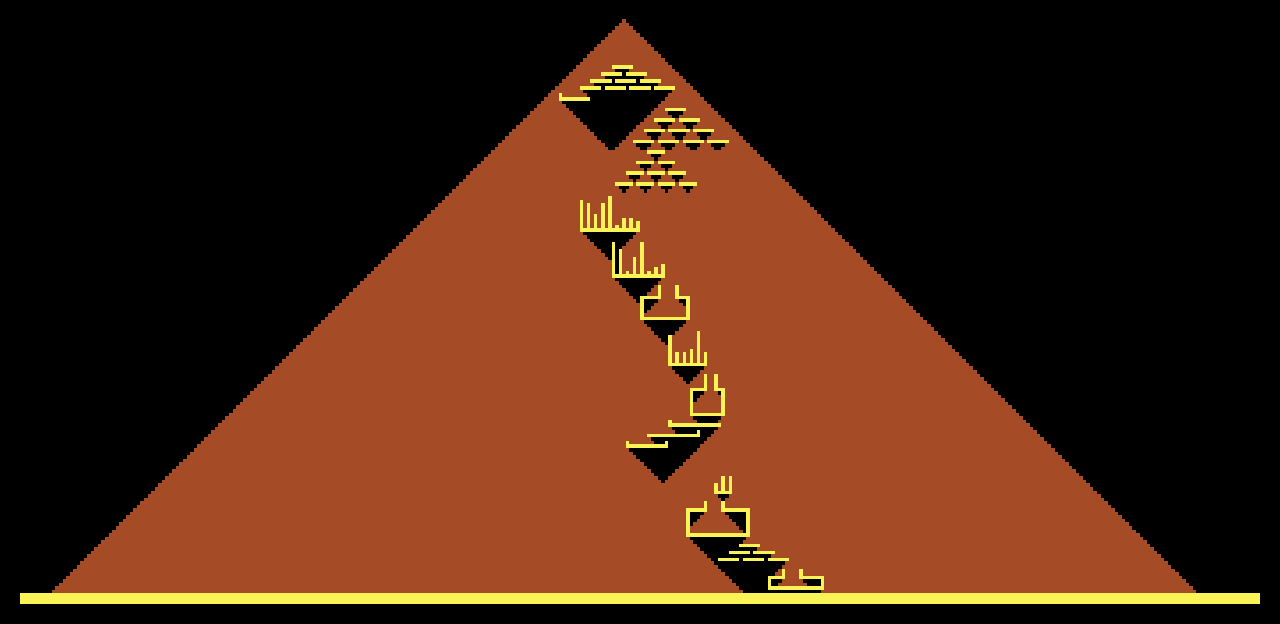

In [142]:
fig,ax = plt.subplots(figsize=(8,4))

ax.imshow(cave,origin="upper",cmap="cmr.amber")
ax.plot(*(np.array(sandpath).T),c="tab:red")
print(f"Total sand: {(cave==1).sum()}")
ax.axis("off")
fig.set_facecolor("k")
